Your image before: 


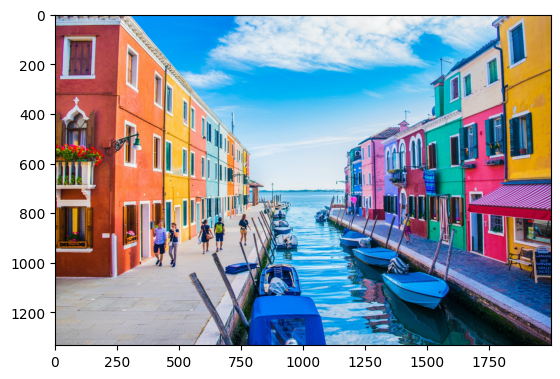

Runtime:  42.101046562194824 seconds
Your image after: 


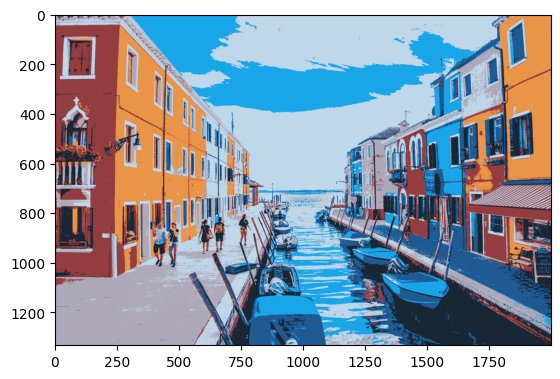

In [2]:
import PIL as pil
import matplotlib.pyplot as plt
import numpy as np
import time
h = w = c = 0

def openImage(testImage):
    return(pil.Image.open(testImage))

def imageToArray(img):
    global h, w, c
    arrImg = np.asarray(img)
    h, w, c = arrImg.shape
    newShape = (h*w, c)
    reshapeImg = np.reshape(arrImg, newShape)
    return(reshapeImg)

def arrayCentroids(arr1DImg,choice, kClusters):
    if(choice == "random"):
        return np.random.choice(range(256), size=(kClusters, len(arr1DImg[0])), replace=False)
    elif(choice == "in_pixel"):
        return arr1DImg[np.random.choice(arr1DImg.shape[0], kClusters, replace=False)]

def findNearestIndex(centroids, arrImg):
    arr1 = np.array(centroids)
    arr2 = np.array(arrImg)

    distances = np.sqrt(((arr2[:, np.newaxis] - arr1) ** 2).sum(axis=2))
    arrLabel = np.argmin(distances, axis=1)

    return arrLabel

def updateCentroids(arrImg, arrLabel, kClusters):
    centroids = np.zeros((kClusters, arrImg.shape[1]))
    for k in range(kClusters):
        colorK = arrImg[arrLabel == k, :]
        centroids[k,:] = np.mean(colorK, axis = 0)
    return centroids

def finalCentroids(arrImg, centroids, kClusters, maxInter):
    for i in range(maxInter):
        arrLabel = findNearestIndex(centroids, arrImg)
        newCentroids = updateCentroids(arrImg, arrLabel, kClusters)
        if np.array_equal(arrLabel, findNearestIndex(newCentroids, arrImg)):
            break
        centroids = newCentroids
    return centroids, arrLabel

def colorLessImage(centroids, labels):
    newImgColor = centroids[labels]
    finalImg = newImgColor.reshape((h, w, 3)).astype(np.uint8)
    return (pil.Image.fromarray(finalImg))

def kmeans(arrImg, kClusters, maxInter, initCentroids):
    centroids = arrayCentroids(arrImg, initCentroids, kClusters)
    newCentroids, labels = finalCentroids(arrImg, centroids, kClusters, maxInter)
    return newCentroids, labels

def main():
    imgInput = input("Input name of picture: ")
    imgOutput = input("Input name of picture after scaling down color: ")
    kClustersInput = input("Input number of colors: ")
    initCentroidsInput = input("Chose init centroids (random: 1), (in_pixel: 2): ")

    if (initCentroidsInput == "1"):
        initCentroids = "random"
    elif (initCentroidsInput == "2"):
        initCentroids = "in_pixel"

    kClusters = int(kClustersInput)
    maxInter = int(100/kClusters)

    img = openImage(imgInput)
    arrImg = imageToArray(img)

    print("Your image before: ")
    plt.imshow(img)
    plt.show()

    start = time.time()
    centroids, labels = kmeans(arrImg, kClusters, maxInter, initCentroids)
    end = time.time()
    executionTime = end - start
    print("Runtime: ", executionTime, "seconds")

    newImg = colorLessImage(centroids, labels)
    newImg.save(imgOutput)

    print("Your image after: ")
    plt.imshow(newImg)
    plt.show()

main()